# Cartera al 15/6

Se importa la librería y se definen los parámetros comunes a todos los bonos.

In [5]:
import QC_Financial as qcf
# Ajuste de fechas en las tablas de desarrollo
end_date_adj = qcf.BusyAdjRules.NO

# Periodicidad de los cupones
periodicity = qcf.Tenor('6M')

# Tipo de período irregular
stub_period = qcf.StubPeriod.NO

# Construcción del calendario relevante. Como no se hacen ajustes de fechas
# no es necesario definir feriados adicionales al sábado y domingo.
inicio_calendario = qcf.QCDate(1, 1, 2018)
calendar = qcf.BusinessCalendar(inicio_calendario, 20)

# Fracción de año y factor de capitalización de la tasa de cupón
yf = qcf.QC30360()
wf = qcf.QCLinearWf()

# Fracción de año y factor de capitalización para la TERA y TIR de mercado.
yield_yf = qcf.QCAct365()
yield_wf = qcf.QCCompoundWf()

# Fecha de valorización.
fecha_valor = qcf.QCDate(26, 6, 2018)

from IPython.display import Image

## Elegir Abajo Nemotécnico Entre: BTU0300119, BCP0400119, BCP0450620, BCU0300221, BTP0450326, BTU0150321, BVAPO-B

In [2]:
data = {'BTU0300119':{'start_date':qcf.QCDate(1, 1, 2012),
                      'end_date': qcf.QCDate(1, 1, 2019),
                      'cupon':.03,
                      'tera':.030202,
                      'tir':0.002},
        'BCP0400119':{'start_date':qcf.QCDate(1, 1, 2016),
                      'end_date': qcf.QCDate(1, 1, 2019),
                      'cupon':.04,
                      'tera':.040364,
                      'tir':0.0275},
        'BCP0450620':{'start_date':qcf.QCDate(1, 6, 2015),
                      'end_date': qcf.QCDate(1, 6, 2020),
                      'cupon':.045,
                      'tera':.045454,
                      'tir':0.0341},
        'BCU0300221':{'start_date':qcf.QCDate(1, 2, 2011),
                      'end_date': qcf.QCDate(1, 2, 2021),
                      'cupon':.03,
                      'tera':.030202,
                      'tir':0.0085},
        'BTP0450326':{'start_date':qcf.QCDate(1, 3, 2015),
                      'end_date': qcf.QCDate(1, 3, 2026),
                      'cupon':.045,
                      'tera':.045466,
                      'tir':0.0459},
        'BTU0150321':{'start_date':qcf.QCDate(1, 3, 2015),
                      'end_date': qcf.QCDate(1, 3, 2021),
                      'cupon':.015,
                      'tera':.015042,
                      'tir':0.0086},
        'BTP0450321':{'start_date':qcf.QCDate(1, 3, 2016),
                      'end_date': qcf.QCDate(1, 3, 2021),
                      'cupon':.045,
                      'tera':.045478,
                      'tir':0.0363},
        'BVAPO-B':{'start_date':qcf.QCDate(30, 9, 2016),
                      'end_date': qcf.QCDate(30, 6, 2021),
                      'cupon':.052,
                      'tera':.051996,
                      'tir':0.0535},
       }

In [9]:
nemo = 'BTP0450321'
start_date = data[nemo]['start_date']
end_date = data[nemo]['end_date']
cupon = qcf.QCInterestRate(data[nemo]['cupon'], yf, qcf.QCLinearWf())
fixed_rate_leg = qcf.LegFactory.build_bullet_fixed_rate_leg(qcf.RecPay.RECEIVE,
                                                           start_date,
                                                           end_date,
                                                           end_date_adj,
                                                           qcf.Tenor('6M'),
                                                           qcf.StubPeriod.SHORTFRONT,
                                                           calendar,
                                                           0,
                                                           100,
                                                           True,
                                                           cupon,
                                                           qcf.QCCLP(),
                                                           True)
for i in range(0, fixed_rate_leg.size()):
    print qcf.show(fixed_rate_leg.get_cashflow_at(i))
tera = qcf.QCInterestRate(data[nemo]['tera'], yield_yf, yield_wf)
bono = qcf.ChileanFixedRateBond(fixed_rate_leg, tera)
mkt_yield = qcf.QCInterestRate(data[nemo]['tir'], yield_yf, yield_wf)
print nemo
print 'precio:\t\t', bono.precio(fecha_valor, mkt_yield)
print 'valor pago:\t', bono.valor_pago(6400000000, qcf.QCCLP(), fecha_valor, mkt_yield)
print 'valor par:\t', round(bono.valor_par(fecha_valor) * 100) / 100
print 'duracion:\t', round(bono.duracion() * 100) / 100
print 'convexidad:\t', round(bono.convexidad() * 100) / 100

('2016-03-01', '2016-09-01', '2016-09-01', 100.0, 0.0, 2.2499999999999964, True, 2.2499999999999964, 'CLP', 0.045, 'Lin30360')
('2016-09-01', '2017-03-01', '2017-03-01', 100.0, 0.0, 2.2499999999999964, True, 2.2499999999999964, 'CLP', 0.045, 'Lin30360')
('2017-03-01', '2017-09-01', '2017-09-01', 100.0, 0.0, 2.2499999999999964, True, 2.2499999999999964, 'CLP', 0.045, 'Lin30360')
('2017-09-01', '2018-03-01', '2018-03-01', 100.0, 0.0, 2.2499999999999964, True, 2.2499999999999964, 'CLP', 0.045, 'Lin30360')
('2018-03-01', '2018-09-01', '2018-09-01', 100.0, 0.0, 2.2499999999999964, True, 2.2499999999999964, 'CLP', 0.045, 'Lin30360')
('2018-09-01', '2019-03-01', '2019-03-01', 100.0, 0.0, 2.2499999999999964, True, 2.2499999999999964, 'CLP', 0.045, 'Lin30360')
('2019-03-01', '2019-09-01', '2019-09-01', 100.0, 0.0, 2.2499999999999964, True, 2.2499999999999964, 'CLP', 0.045, 'Lin30360')
('2019-09-01', '2020-03-01', '2020-03-01', 100.0, 0.0, 2.2499999999999964, True, 2.2499999999999964, 'CLP', 0.0

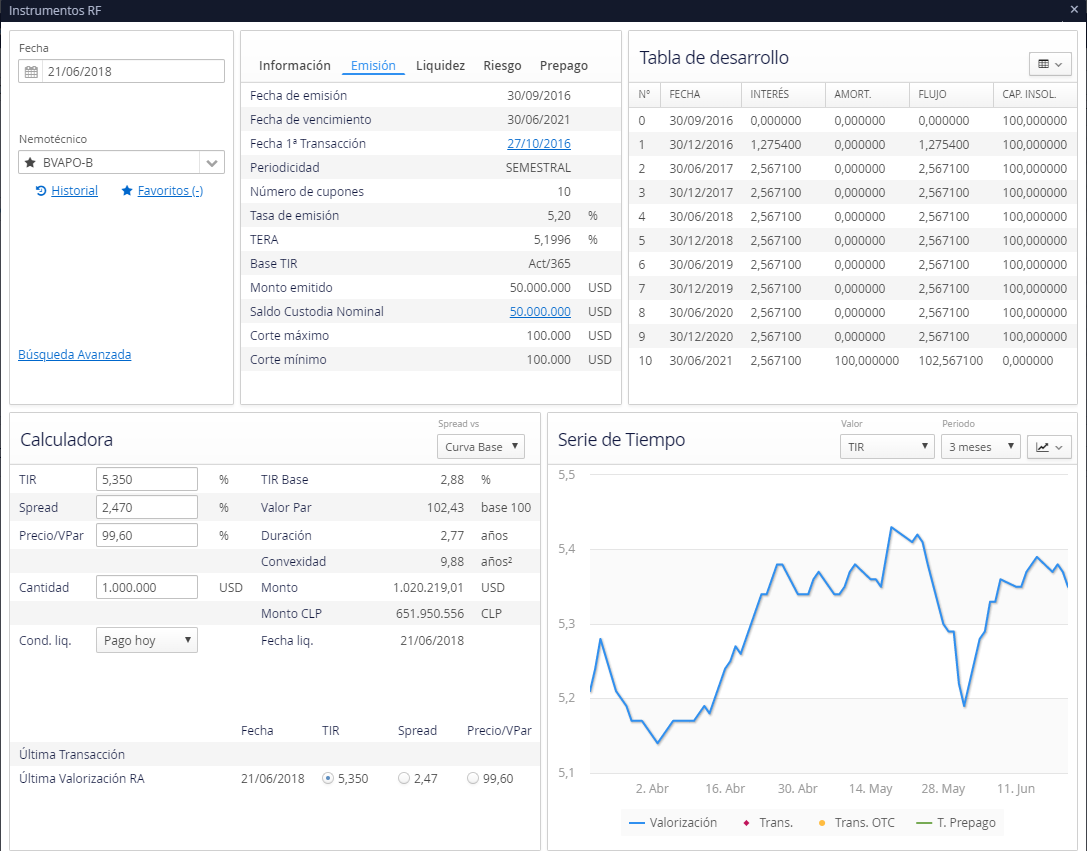

In [92]:
nemo = 'BVAPO-B'
Image(nemo + ".png")

Fecha de inicio, fecha final y tasa de cupón. Esto para generar la tabla de desarrollo (en vez de cargarla).

In [121]:
start_date = data[nemo]['start_date']
end_date = data[nemo]['end_date']
cupon = qcf.QCInterestRate(data[nemo]['cupon'], yf, qcf.QCCompoundWf())

Se genera la tabla de desarrollo.

In [122]:
fixed_rate_leg = qcf.LegFactory.build_bullet_fixed_rate_leg(qcf.RecPay.RECEIVE,
                                                           start_date,
                                                           end_date,
                                                           end_date_adj,
                                                           qcf.Tenor('6M'),
                                                           qcf.StubPeriod.SHORTFRONT,
                                                           calendar,
                                                           0,
                                                           100,
                                                           True,
                                                           cupon,
                                                           qcf.QCCLF(),
                                                           True)

Se muestra la tabla de desarrollo.

In [123]:
for i in range(0, fixed_rate_leg.size()):
    print qcf.show(fixed_rate_leg.get_cashflow_at(i))

('2016-09-30', '2016-12-30', '2016-12-30', 100.0, 0.0, 1.27539248981694, True, 1.27539248981694, 'CLF', 0.052, 'Com30360')
('2016-12-30', '2017-06-30', '2017-06-30', 100.0, 0.0, 2.567051239664675, True, 2.567051239664675, 'CLF', 0.052, 'Com30360')
('2017-06-30', '2017-12-30', '2017-12-30', 100.0, 0.0, 2.567051239664675, True, 2.567051239664675, 'CLF', 0.052, 'Com30360')
('2017-12-30', '2018-06-30', '2018-06-30', 100.0, 0.0, 2.567051239664675, True, 2.567051239664675, 'CLF', 0.052, 'Com30360')
('2018-06-30', '2018-12-30', '2018-12-30', 100.0, 0.0, 2.567051239664675, True, 2.567051239664675, 'CLF', 0.052, 'Com30360')
('2018-12-30', '2019-06-30', '2019-06-30', 100.0, 0.0, 2.567051239664675, True, 2.567051239664675, 'CLF', 0.052, 'Com30360')
('2019-06-30', '2019-12-30', '2019-12-30', 100.0, 0.0, 2.567051239664675, True, 2.567051239664675, 'CLF', 0.052, 'Com30360')
('2019-12-30', '2020-06-30', '2020-06-30', 100.0, 0.0, 2.567051239664675, True, 2.567051239664675, 'CLF', 0.052, 'Com30360')
('

Se da de alta la TERA del bono.

In [124]:
tera = qcf.QCInterestRate(data[nemo]['tera'], yield_yf, yield_wf)

Se da de alta el bono.

In [125]:
bono = qcf.ChileanFixedRateBond(fixed_rate_leg, tera)

Se define la TIR de mercado.

In [126]:
mkt_yield = qcf.QCInterestRate(data[nemo]['tir'], yield_yf, yield_wf)

Se verifica el precio y otros indicadores del bono.

In [127]:
print nemo
print 'precio:\t\t', bono.precio(fecha_valor, mkt_yield)
print 'valor par:\t', round(bono.valor_par(fecha_valor) * 100) / 100
print 'duracion:\t', round(bono.duracion() * 100) / 100
print 'convexidad:\t', round(bono.convexidad() * 100) / 100

BVAPO-B
precio:		0.996
valor par:	102.35
duracion:	2.79
convexidad:	9.98
